In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd 

df = pd.read_csv("kc_house_data.csv")

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
x = df[['sqft_living']] #predictor
y = df[['price']] #target

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
x_train.shape

(17290, 1)

In [ ]:
x_test.shape

(4323, 1)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train) #model gets trained here 

LinearRegression()

In [ ]:
lr.coef_

array([[282.69899736]])

In [ ]:
lr.intercept_

array([-46651.02714558])

In [ ]:
# price = 282.69899736(sqft_living) -46651.02714558

In [ ]:
import numpy as np
lr.predict(np.array([[1200]]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[292587.76968763]])

In [ ]:
lr.predict(pd.DataFrame([1200]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[292587.76968763]])

In [ ]:
a = np.array([1180]).reshape(1, -1)

In [ ]:
lr.predict(a)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[286933.78974041]])

In [ ]:
221900.0

In [ ]:
y_pred = lr.predict(y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


In [ ]:
y_pred.shape

(4323, 1)

In [ ]:
#testing_accuracy 
mean_squared_error(y_pred, y_test)

3.3575678837682344e+16

In [ ]:
x_pred = lr.predict(x_train)

In [ ]:
#training_accuracy
mean_squared_error(x_pred, y_train)

68386894528.53113

# Polynomial Regression

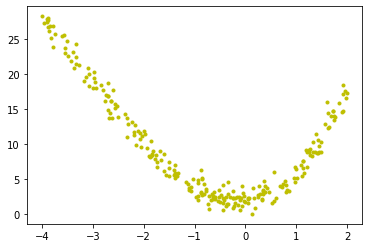

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

x = 6 * np.random.rand(250, 1) - 4
y = 0.3 * x**3 + 3 * x**2 + 0.7 * x + 2 + np.random.randn(250, 1)
plt.plot(x, y, 'y.')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_trans,y_train)
y_pred = model.predict(x_test_trans)

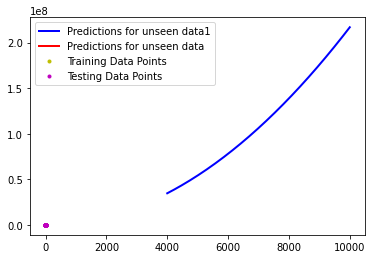

In [ ]:
x_unseen = np.linspace(-3, 3, 130).reshape(130, 1)
x_unseen_trans = poly.transform(x_unseen)
pred_unseen = model.predict(x_unseen_trans)


x_unseen1 = np.linspace(4000, 10000, 130).reshape(130, 1)
x_unseen1_trans = poly.transform(x_unseen1)
pred_unseen1 = model.predict(x_unseen1_trans)

plt.plot(x_unseen1, pred_unseen1, "b-", linewidth = 2, label= "Predictions for unseen data1")
plt.plot(x_unseen, pred_unseen, "r-", linewidth = 2, label= "Predictions for unseen data")
plt.plot(x_train, y_train, "y.", label = "Training Data Points")
plt.plot(x_test, y_test, "m.", label = "Testing Data Points")

plt.legend()

## Multinomial Classification 

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_classification 

x, y = make_classification(n_samples = 3000, n_features = 10, n_redundant = 4, n_classes = 3, n_informative = 4, random_state = 50)

In [ ]:
x.shape 

(3000, 10)

In [ ]:
y.shape

(3000,)

In [ ]:
import numpy as np

np.unique(y)

array([0, 1, 2])

In [ ]:
model = LogisticRegression(multi_class= "multinomial")
model.fit(x, y)

LogisticRegression(multi_class='multinomial')

In [ ]:
lst = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

model.predict([lst])

array([2])

In [ ]:
model.predict_proba([lst])

array([[0.13539813, 0.01716324, 0.84743863]])

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_classification 
import seaborn as sns 

df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]


In [ ]:
model = LogisticRegression(multi_class= "multinomial", solver = "sag")
model.fit(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
lst = [6.5,	3.0,	5.2,	2.0]
print(model.predict([lst]))
print(model.predict_proba([lst]))

['virginica']
[[7.18816370e-04 2.12856665e-01 7.86424519e-01]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
model.class_weight

In [ ]:
model.penalty

'l2'

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}